In [3]:
%pip install tensorflow


  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf
import os 


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:

        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a CNN model
model = tf.keras.models.Sequential([
   # First convolutional layer with 64 filters, kernel size of 3, and 'same' padding to maintain input size
  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
  # Batch normalization to normalize the activations from the previous layer
  tf.keras.layers.BatchNormalization(),
  # Max pooling layer with pool size of 2x2
  tf.keras.layers.MaxPooling2D((2, 2)),
  
  # Increasing the number of filters with depth to capture more complex features
  tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  # Dropout to prevent overfitting by randomly setting a fraction of input units to 0 during training
  tf.keras.layers.Dropout(0.3),

  # Further increasing the number of filters
  tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Dropout(0.4),
  
  # Flatten the output of the convolutional layers to feed into the dense layers
  tf.keras.layers.Flatten(),
  # Dense (fully connected) layer with 512 units and ReLU activation
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  # Output dense layer with 10 units, one for each class, with no activation 
  tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs= 15, validation_data=(x_test, y_test))

# Save the model in TensorFlow SavedModel format
model.save(os.path.join(os.getcwd(),"1"))  # The '1' denotes the model version

Epoch 1/15
1563/1563 [==============================] - 74s 46ms/step - loss: 1.4172 - accuracy: 0.5068 - val_loss: 1.3013 - val_accuracy: 0.5490
Epoch 2/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9212 - accuracy: 0.6778 - val_loss: 0.8881 - val_accuracy: 0.6963
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7612 - accuracy: 0.7346 - val_loss: 0.7349 - val_accuracy: 0.7444
Epoch 4/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6570 - accuracy: 0.7735 - val_loss: 0.7303 - val_accuracy: 0.7443
Epoch 5/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5729 - accuracy: 0.8036 - val_loss: 0.7346 - val_accuracy: 0.7580
Epoch 6/15
1563/1563 [==============================] - 70s 44ms/step - loss: 0.5161 - accuracy: 0.8229 - val_loss: 0.6567 - val_accuracy: 0.7859
Epoch 7/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4565 - accuracy: 0.8431 - val_loss: 0.8630 -

INFO:tensorflow:Assets written to: d:\desktop20230924-\Assignment 2\1\assets


In [30]:
# Evaluate the model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 0.5100 - accuracy: 0.8472 - 5s/epoch - 15ms/step


[0.509979784488678, 0.8471999764442444]

In [13]:
#TODO Use TensorFlow_serving.ipynb to figure out how to stop the tensorflow serving from running and remove the container if one exists

!docker stop tf_serving
!docker rm tf_serving

tf_serving
tf_serving


In [14]:
#TODO Use TensorFlow_serving.ipynb to figure out how to pull the image for tensorflow serving and open a container to serve our model 

!docker pull tensorflow/serving
!docker run -p 8501:8501 --name=tf_serving --mount type=bind,source="D:/desktop20230924-/Assignment 2/1/",target=/models/my_model/1 -e MODEL_NAME=my_model -t tensorflow/serving


Using default tag: latest
latest: Pulling from tensorflow/serving
Digest: sha256:fdc296e313fa4454173c5728fceda38f5d18cdb44c71a9f279ce61bc5818335e
Status: Image is up to date for tensorflow/serving:latest
docker.io/tensorflow/serving:latest



What's Next?
  View a summary of image vulnerabilities and recommendations → docker scout quickview tensorflow/serving


^C


Time needed to make prediction: 0.062499284744262695


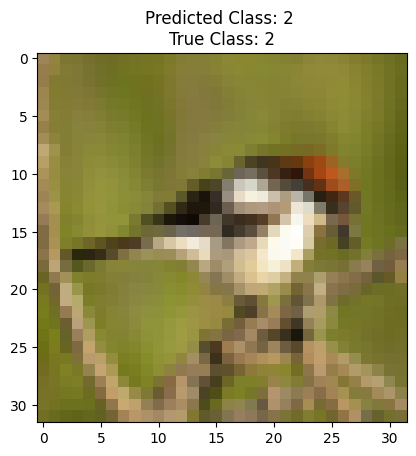

In [32]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import time 

# Select a random test image
idx = np.random.randint(len(x_test))
test_image = x_test[idx]
test_image_input = test_image.reshape(1, 32, 32, 3)

# Convert to list for JSON
image_list = test_image_input.tolist()

# URL of TensorFlow Serving server
url = 'http://localhost:8501/v1/models/my_model:predict'

# Select a random test image
idx = np.random.randint(len(x_test))
test_image = x_test[idx]
test_image_input = test_image.reshape(1, 32, 32, 3)

# Convert to list for JSON
image_list = test_image_input.tolist()

# Prepare input data
data = {"instances": image_list}
json_data = json.dumps(data)

# Send POST request


# using ML_Systems_Assignment_1.ipynb, figure out how much time it takes (the latency) between sending an image to our ML model and receiving a repsonse.
start_time=time.time()
response = requests.post(url, data=json_data)
end_time=time.time()
latency= end_time - start_time
result = response.json()

print(f"Time needed to make prediction: {latency}")  

# Interpret the response
predicted_class = np.argmax(result['predictions'][0])


# Display the results
plt.imshow(test_image)
plt.title(f"Predicted Class: {predicted_class} \nTrue Class: {y_test[idx][0]}")
plt.show()
